## Dataset pre-processing and analysis

### Importing libs

In [315]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading dataset

In [316]:
df = pd.read_csv('adult.csv')

In [317]:
df.shape

(32561, 15)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [319]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [320]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Encoding target

In [321]:
df["income"] = df["income"].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})

In [322]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


### Resolving missing values problem

Replacing ? with Nans

In [323]:
df[df == '?'] = np.nan

In [324]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Imputing missing values with mode

In [325]:
# for col in ['workclass', 'occupation', 'native.country']:
#    df[col].fillna(df[col].mode()[0], inplace=True)

Or removing the rows that contain one or more missing values

In [326]:
df = df.dropna()

In [327]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [328]:
df.shape

(30162, 15)

### Visualization

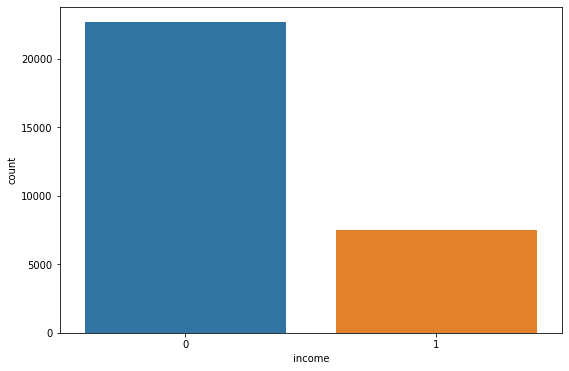

In [329]:
plt.subplots(figsize=(9, 6))
sns.countplot(df['income'])

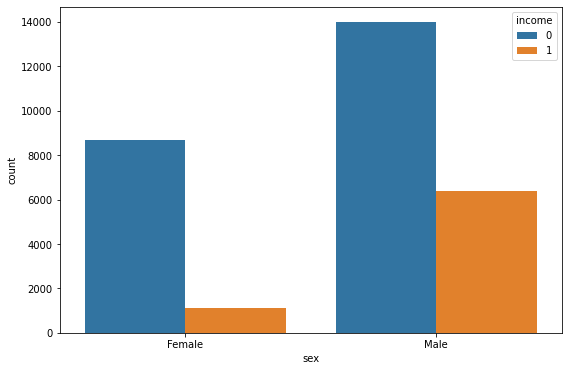

In [330]:
plt.subplots(figsize=(9, 6))
sns.countplot(df['sex'], hue=df['income'])

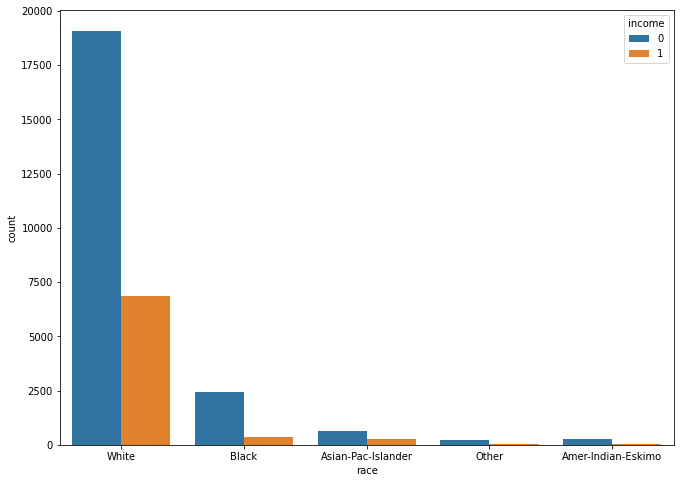

In [331]:
plt.subplots(figsize=(11, 8))
sns.countplot(df['race'], hue=df['income'])

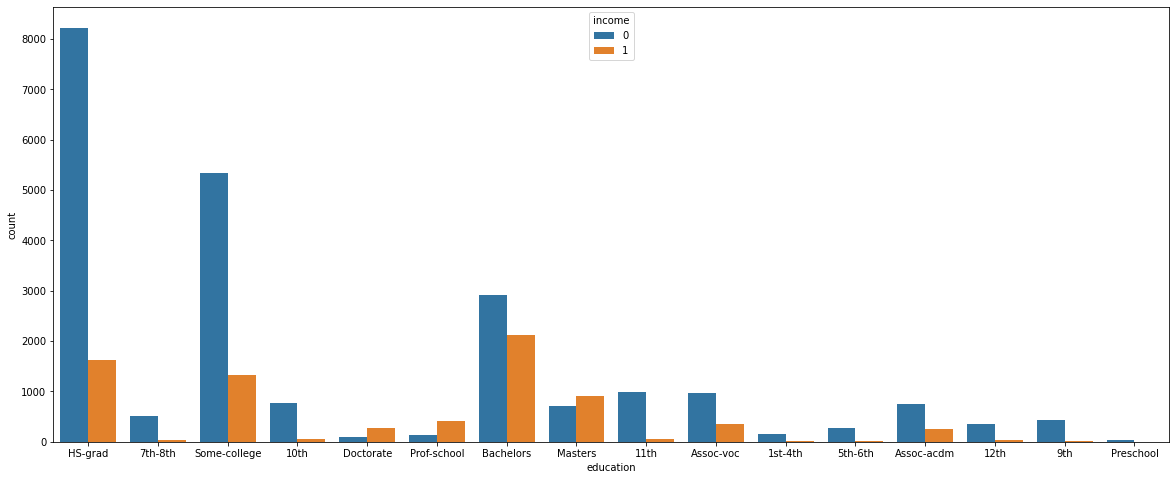

In [332]:
plt.subplots(figsize=(20, 8))
ax = sns.countplot(df['education'], hue=df['income'])

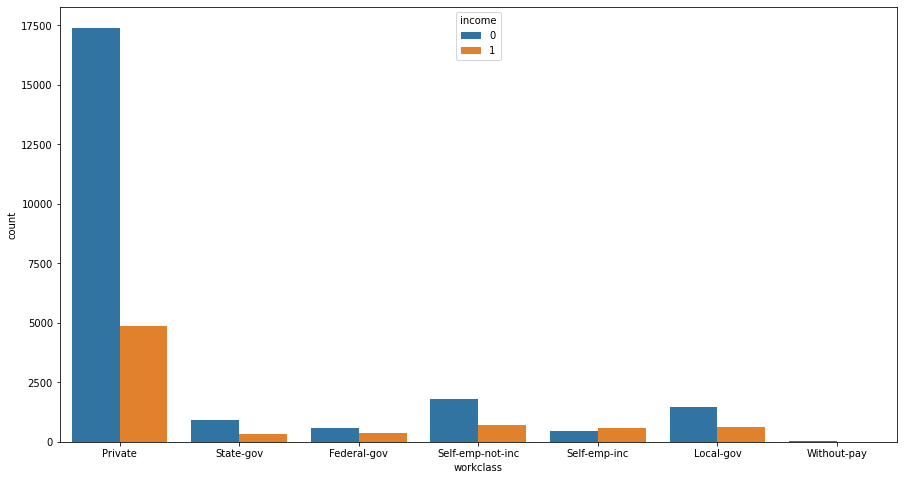

In [333]:
plt.subplots(figsize=(15, 8))
sns.countplot(df['workclass'], hue=df['income'])

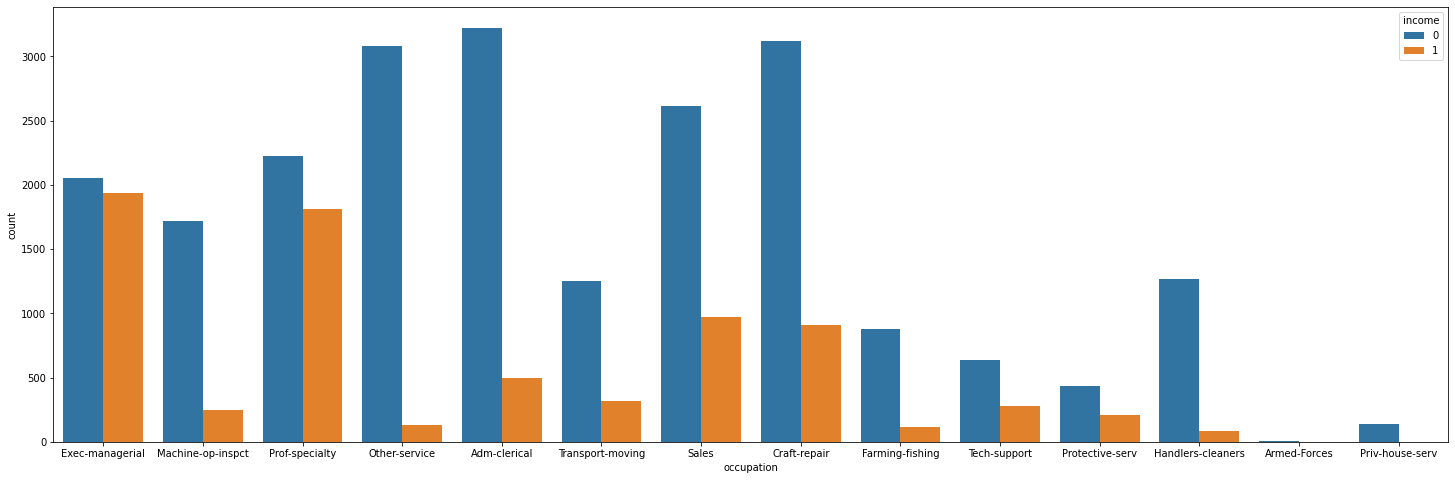

In [334]:
plt.subplots(figsize=(25, 8))
sns.countplot(df['occupation'], hue=df['income'])

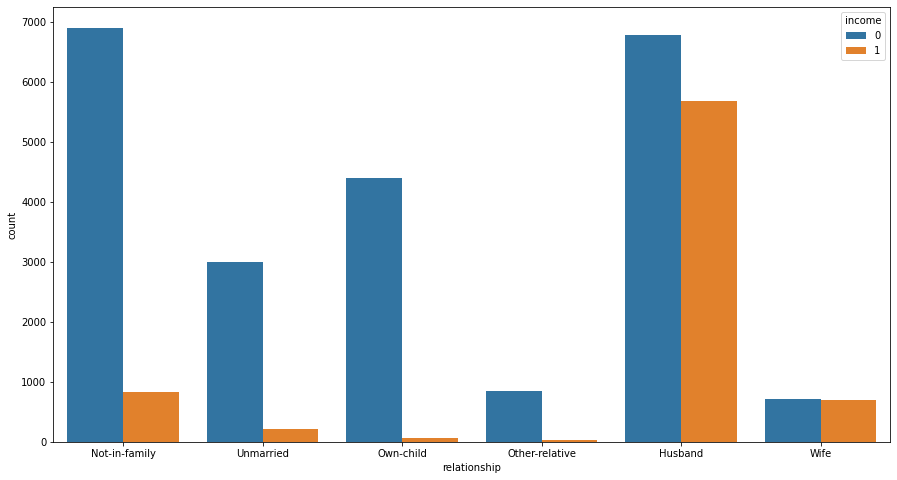

In [335]:
plt.subplots(figsize=(15, 8))
sns.countplot(df['relationship'], hue=df['income'])

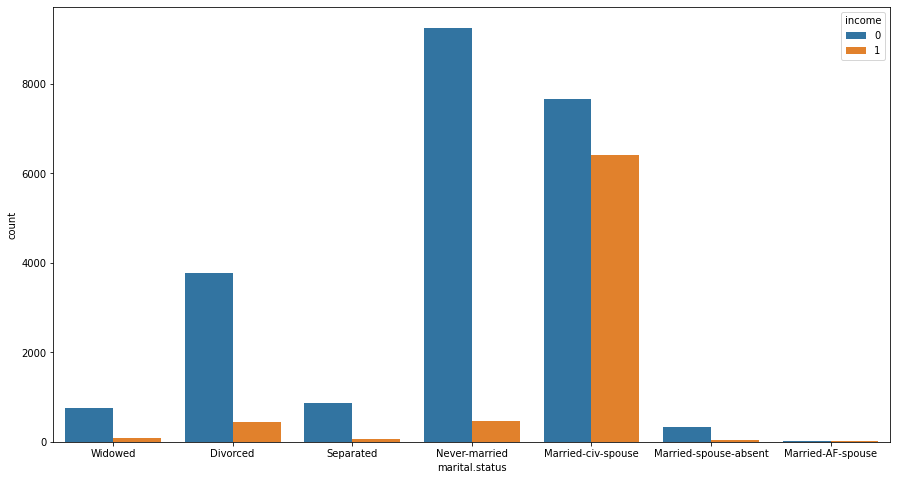

In [336]:
plt.subplots(figsize=(15, 8))
sns.countplot(df['marital.status'], hue=df['income'])

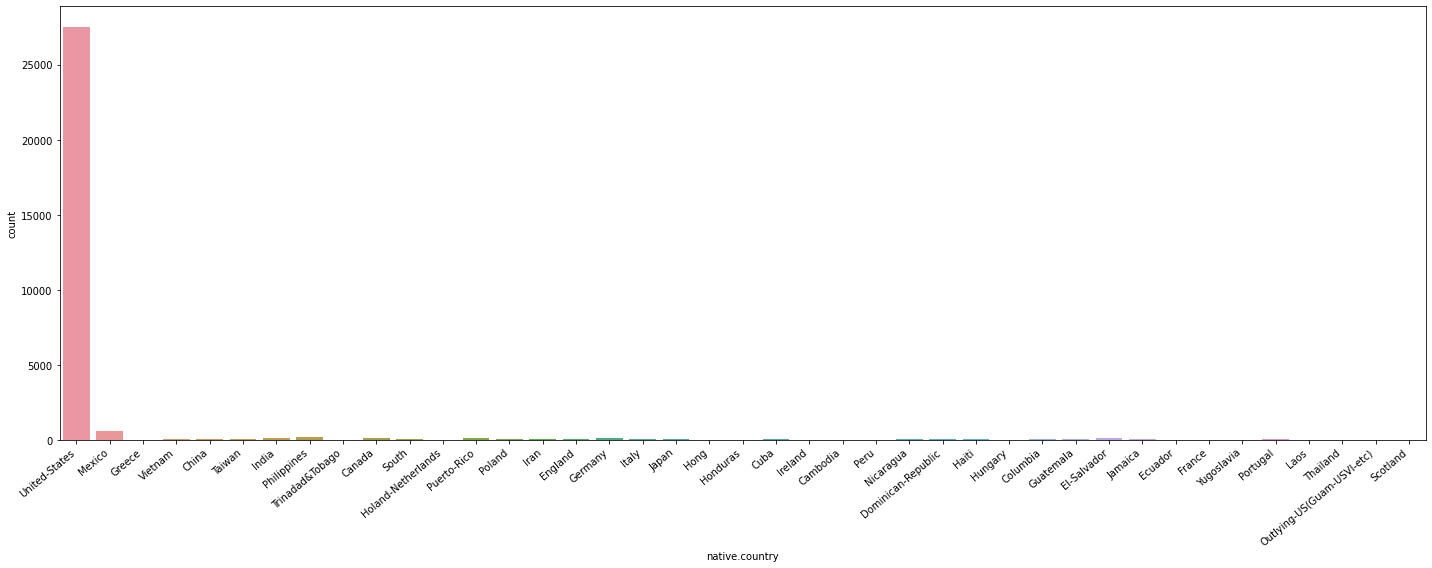

In [337]:
plt.subplots(figsize=(20, 8))
ax = sns.countplot(df['native.country']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

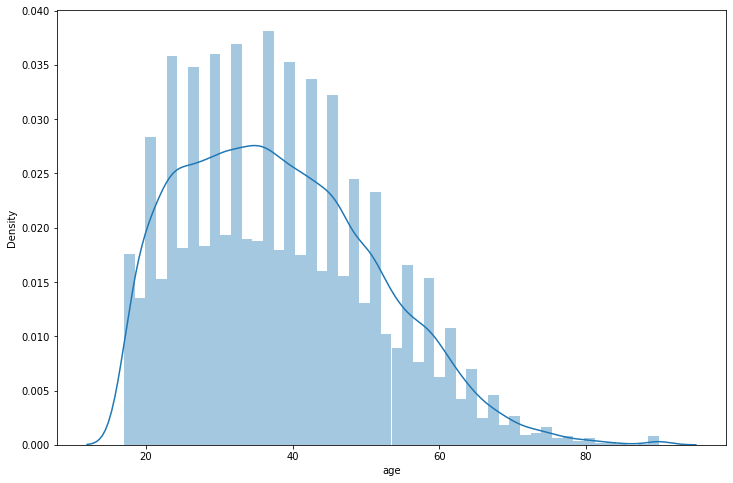

In [338]:
plt.subplots(figsize=(12, 8))
sns.distplot(df['age'])

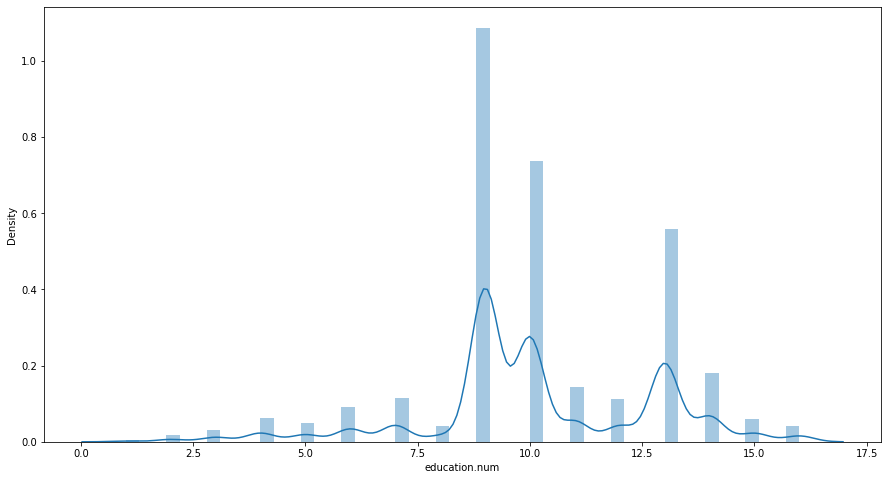

In [339]:
plt.figure(figsize=(15,8))
sns.distplot(df['education.num']);

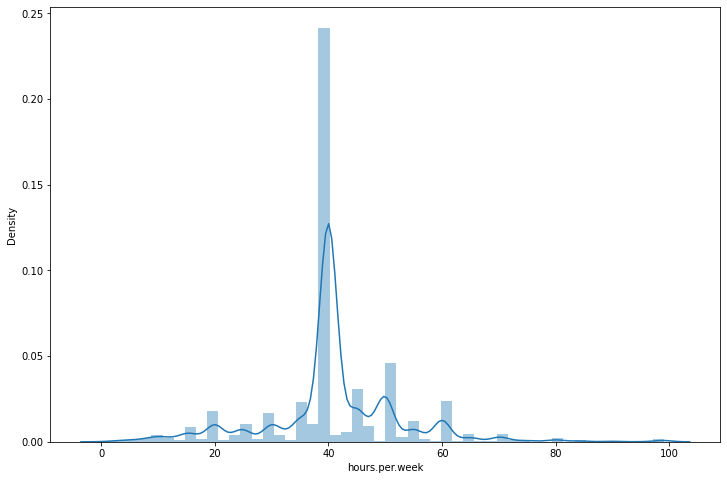

In [340]:
plt.subplots(figsize=(12, 8))
sns.distplot(df['hours.per.week'])

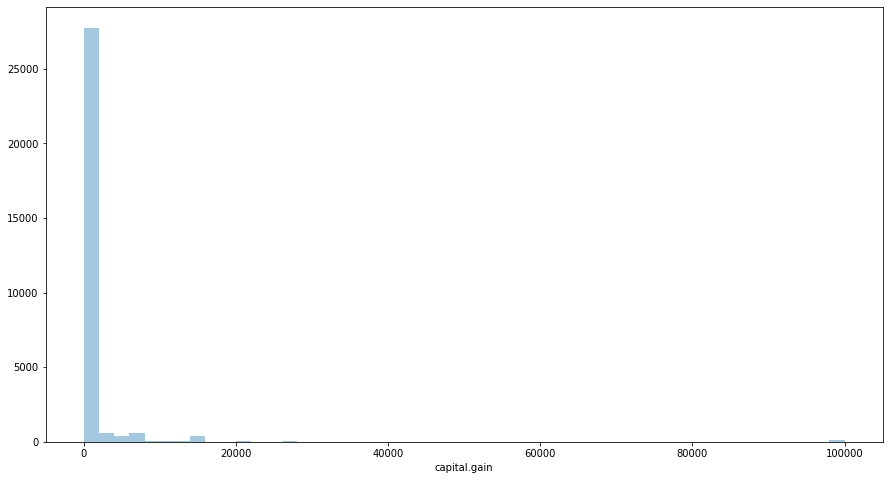

In [341]:
plt.subplots(figsize=(15, 8))
sns.distplot(df['capital.gain'], kde=False)

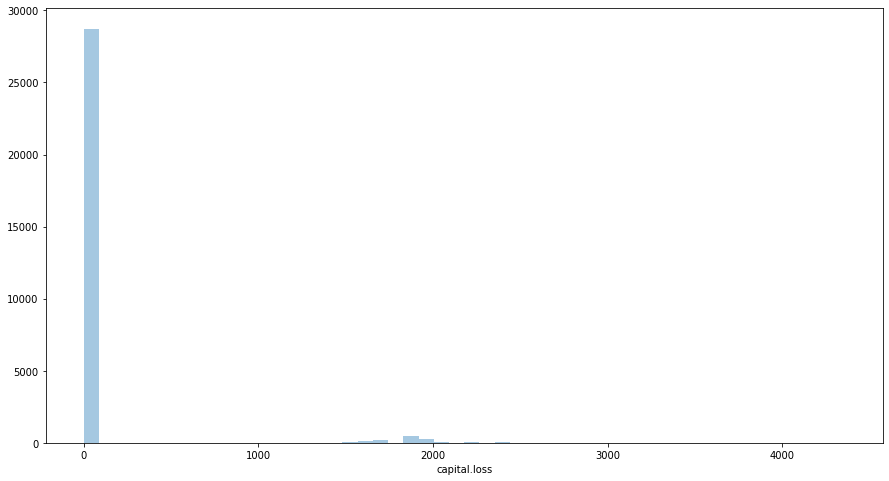

In [342]:
plt.subplots(figsize=(15, 8))
sns.distplot(df['capital.loss'], kde=False)

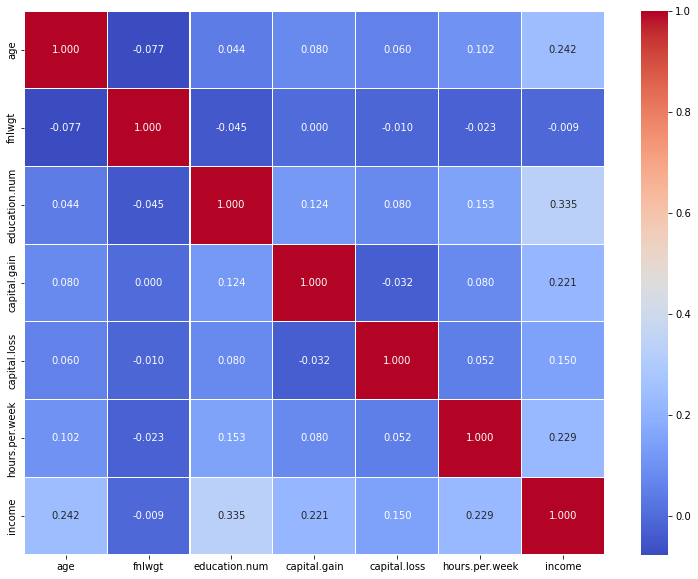

In [343]:
corr = df.corr(method='pearson')

plt.subplots(figsize=(13, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.3f', linewidths=.05)

### Setting features and target

In [344]:
X = df.drop(['income'], axis=1)

In [345]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States


In [346]:
Y = df['income']

In [347]:
Y.head()

1    0
3    0
4    0
5    0
6    0
Name: income, dtype: int64

### Spliting dataset into separate train and test sets

In [348]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.25

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = TEST_SIZE, random_state = 0)

### Feature encoding

In [349]:
numerical_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']
categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

In [350]:
from sklearn import preprocessing

for feature in categorical_features:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [351]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
23257,31,4,36592,11,9,2,4,0,4,1,0,0,91,38
18118,41,2,268183,14,15,2,9,0,4,1,0,0,45,38
16202,30,3,153549,11,9,2,3,0,4,1,0,0,50,38
683,35,2,161637,10,16,2,9,0,1,1,0,1902,40,35
19641,34,2,143699,11,9,2,11,5,4,0,0,0,15,38


### Feature scaling

In [352]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [353]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,-0.568466,1.874761,-1.448366,0.173424,-0.450094,-0.388133,-0.490133,-0.883122,0.383053,0.689431,-0.147357,-0.220080,4.172224,0.262955
1,0.193736,-0.211832,0.737802,0.964621,1.912314,-0.388133,0.750251,-0.883122,0.383053,0.689431,-0.147357,-0.220080,0.337314,0.262955
2,-0.644686,0.831464,-0.344318,0.173424,-0.450094,-0.388133,-0.738210,-0.883122,0.383053,0.689431,-0.147357,-0.220080,0.754152,0.262955
3,-0.263585,-0.211832,-0.267969,-0.090309,2.306048,-0.388133,0.750251,-0.883122,-3.227385,0.689431,-0.147357,4.449685,-0.079524,-0.231625
4,-0.339805,-0.211832,-0.437299,0.173424,-0.450094,-0.388133,1.246404,2.236448,0.383053,-1.450472,-0.147357,-0.220080,-2.163714,0.262955


### Visualization after pre-processing

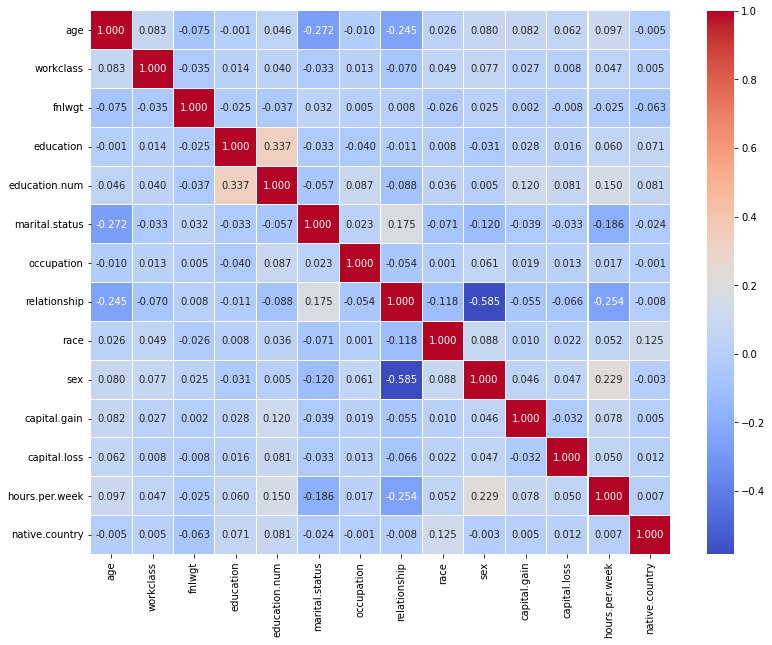

In [354]:
corr = X_train.corr(method='pearson')

plt.subplots(figsize=(13, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.3f', linewidths=.05)

## Models

In [355]:
from sklearn.metrics import accuracy_score, confusion_matrix

### Logistic Regression

In [356]:
from sklearn.linear_model import LogisticRegression

logistic_regression_classifier = LogisticRegression()

logistic_regression_classifier.fit(X_train, Y_train)

LogisticRegression()

In [357]:
Y_pred = logistic_regression_classifier.predict(X_test)

logistic_regression_acc = accuracy_score(Y_test, Y_pred)
print(f"Logistic Regression accuracy score: {logistic_regression_acc:.4f}")

Logistic Regression accuracy score: 0.8226


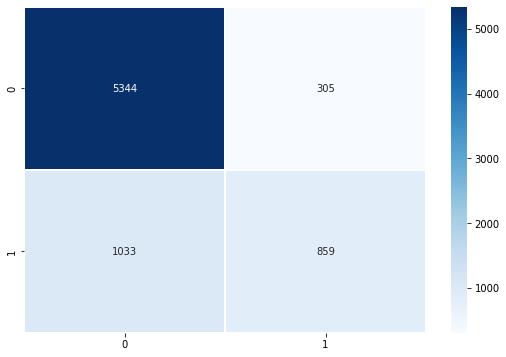

In [358]:
logistic_regression_cm = confusion_matrix(Y_test, Y_pred)

plt.subplots(figsize=(9, 6))
sns.heatmap(logistic_regression_cm, annot=True, cmap=plt.cm.Blues, fmt='d', linewidths=1)

### Linear Discriminant Analysis

In [359]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_classifier = LinearDiscriminantAnalysis()

lda_classifier.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [360]:
Y_pred = lda_classifier.predict(X_test)

lda_acc = accuracy_score(Y_test, Y_pred)
print(f"Linear Discriminant Analysis accuracy score: {lda_acc:.4f}")

Linear Discriminant Analysis accuracy score: 0.8100


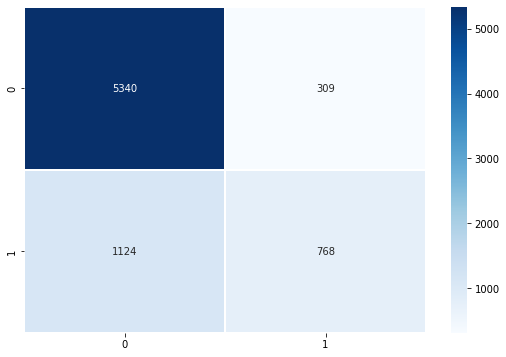

In [361]:
lda_cm = confusion_matrix(Y_test, Y_pred)

plt.subplots(figsize=(9, 6))
sns.heatmap(lda_cm, annot=True, cmap=plt.cm.Blues, fmt='d', linewidths=1)

### KNN

In [362]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [363]:
Y_pred = knn_classifier.predict(X_test)

knn_acc = accuracy_score(Y_test, Y_pred)
print(f"KNN accuracy score: {knn_acc:.4f}")

KNN accuracy score: 0.8252


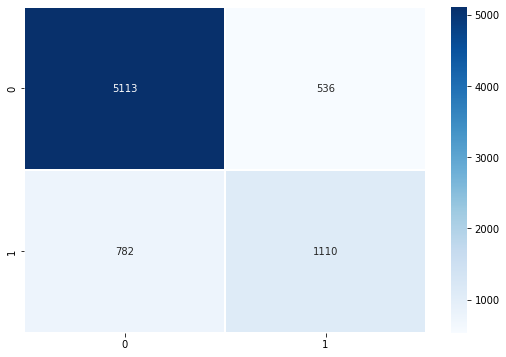

In [364]:
knn_cm = confusion_matrix(Y_test, Y_pred)

plt.subplots(figsize=(9, 6))
sns.heatmap(knn_cm, annot=True, cmap=plt.cm.Blues, fmt='d', linewidths=1)

### Naive Bayes

In [365]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(X_train, Y_train)

GaussianNB()

In [366]:
Y_pred = naive_bayes_classifier.predict(X_test)

naive_bayes_acc = accuracy_score(Y_test, Y_pred)
print(f"Naive Bayes accuracy score: {naive_bayes_acc:.4f}")

Naive Bayes accuracy score: 0.8039


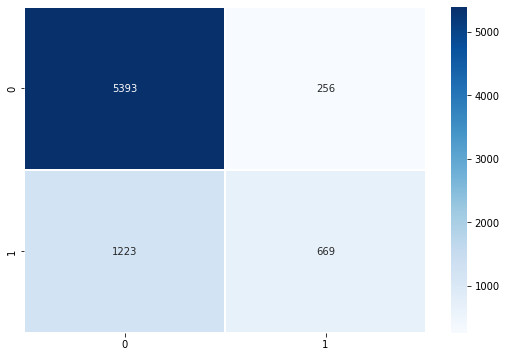

In [367]:
naive_bayes_cm = confusion_matrix(Y_test, Y_pred)

plt.subplots(figsize=(9, 6))
sns.heatmap(naive_bayes_cm, annot=True, cmap=plt.cm.Blues, fmt='d', linewidths=1)

### SVM

In [368]:
from sklearn.svm import SVC

svc_classifier = SVC()

svc_classifier.fit(X_train, Y_train)

SVC()

In [369]:
Y_pred = svc_classifier.predict(X_test)

# kernel='rbf', C=1e3, gamma=0.1
svc_acc = accuracy_score(Y_test, Y_pred)
print(f"SVM accuracy score: {svc_acc:.4f}")

SVM accuracy score: 0.8430


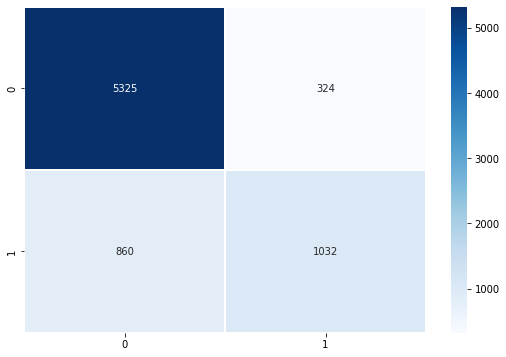

In [370]:
svc_cm = confusion_matrix(Y_test, Y_pred)

plt.subplots(figsize=(9, 6))
sns.heatmap(svc_cm, annot=True, cmap=plt.cm.Blues, fmt='d', linewidths=1)

### Bagging

In [371]:
from sklearn.ensemble import BaggingClassifier

bagging_classifier = BaggingClassifier()

bagging_classifier.fit(X_train, Y_train)

BaggingClassifier()

In [372]:
Y_pred = bagging_classifier.predict(X_test)

bagging_acc = accuracy_score(Y_test, Y_pred)
print(f"Bagging accuracy score: {bagging_acc:.4f}")

Bagging accuracy score: 0.8427


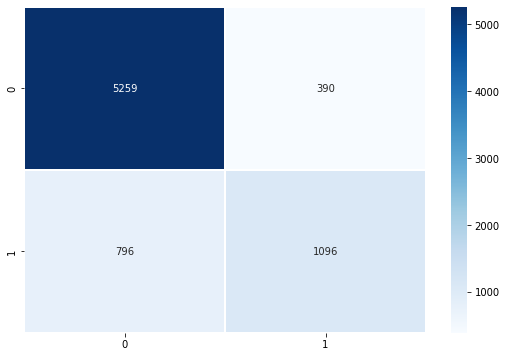

In [373]:
bagging_cm = confusion_matrix(Y_test, Y_pred)

plt.subplots(figsize=(9, 6))
sns.heatmap(bagging_cm, annot=True, cmap=plt.cm.Blues, fmt='d', linewidths=1)

### Decision Tree

In [374]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [375]:
Y_pred = decision_tree_classifier.predict(X_test)

decision_tree_acc = accuracy_score(Y_test, Y_pred)
print(f"Decision Tree accuracy score: {decision_tree_acc:.4f}")

Decision Tree accuracy score: 0.8109


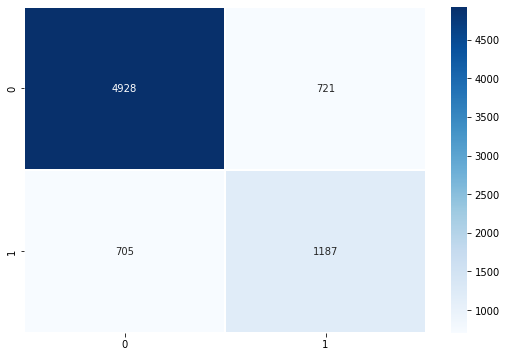

In [376]:
decision_tree_cm = confusion_matrix(Y_test, Y_pred)

plt.subplots(figsize=(9, 6))
sns.heatmap(decision_tree_cm, annot=True, cmap=plt.cm.Blues, fmt='d', linewidths=1)

### Random Forest

In [377]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

random_forest_classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [378]:
Y_pred = random_forest_classifier.predict(X_test)

random_forest_acc = accuracy_score(Y_test, Y_pred)
print(f"Random Forest accuracy score: {random_forest_acc:.4f}")

Random Forest accuracy score: 0.8533


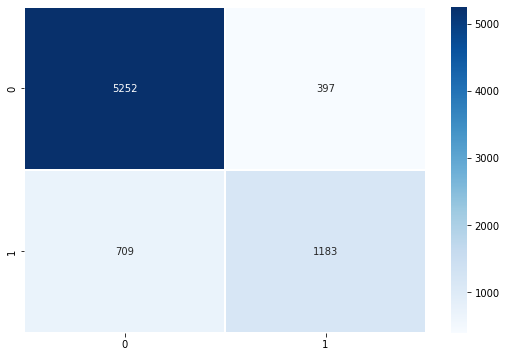

In [379]:
random_forest_cm = confusion_matrix(Y_test, Y_pred)

plt.subplots(figsize=(9, 6))
sns.heatmap(random_forest_cm, annot=True, cmap=plt.cm.Blues, fmt='d', linewidths=1)

### Gradient Boosting

In [380]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_classifier = GradientBoostingClassifier()

gradient_boosting_classifier.fit(X_train, Y_train)

GradientBoostingClassifier()

In [381]:
Y_pred = gradient_boosting_classifier.predict(X_test)

gradient_boosting_acc = accuracy_score(Y_test, Y_pred)
print(f"Gradient Boosting accuracy score: {gradient_boosting_acc:.4f}")

Gradient Boosting accuracy score: 0.8609


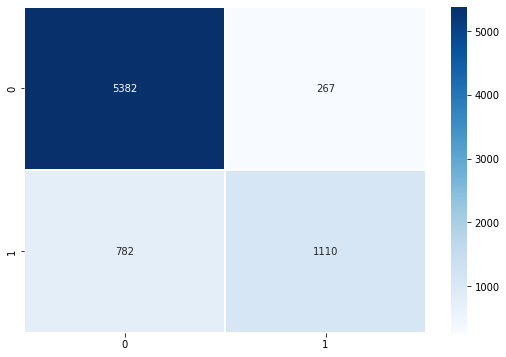

In [382]:
gradient_boosting_cm = confusion_matrix(Y_test, Y_pred)

plt.subplots(figsize=(9, 6))
sns.heatmap(gradient_boosting_cm, annot=True, cmap=plt.cm.Blues, fmt='d', linewidths=1)

### MLP

In [383]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

mlp_model = Sequential()

mlp_model.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu'))
mlp_model.add(Dense(50, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid'))

mlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

mlp_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1500      
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6,601
Trainable params: 6,601
Non-trainable params: 0
_________________________________________________________________


In [384]:
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, verbose=1)

history = mlp_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10000, batch_size=1000, callbacks=[early_stopping_callback], verbose=1)

Epoch 1/10000
23/23 [==============================] - 1s 11ms/step - loss: 0.5214 - accuracy: 0.7659 - val_loss: 0.4293 - val_accuracy: 0.8113
Epoch 2/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.4033 - accuracy: 0.8207 - val_loss: 0.3901 - val_accuracy: 0.8197
Epoch 3/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3771 - accuracy: 0.8269 - val_loss: 0.3721 - val_accuracy: 0.8264
Epoch 4/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3613 - accuracy: 0.8311 - val_loss: 0.3595 - val_accuracy: 0.8321
Epoch 5/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3487 - accuracy: 0.8363 - val_loss: 0.3493 - val_accuracy: 0.8387
Epoch 6/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3401 - accuracy: 0.8384 - val_loss: 0.3430 - val_accuracy: 0.8402
Epoch 7/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.3347 - accuracy: 0.8418 - val_loss: 0.3400 - val_accuracy: 0.844

In [385]:
Y_pred = mlp_model.predict(X_test, verbose=1)
Y_pred = list(map(lambda x: 0 if x < 0.5 else 1, Y_pred))

mlp_acc = accuracy_score(Y_test, Y_pred)
print(f"MLP accuracy score: {mlp_acc:.4f}")

236/236 [==============================] - 0s 1ms/step
MLP accuracy score: 0.8462


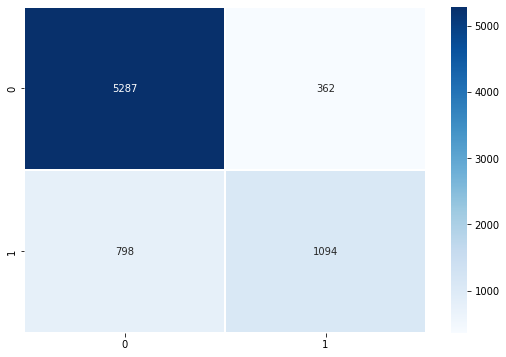

In [386]:
mlp_cm = confusion_matrix(Y_test, Y_pred)

plt.subplots(figsize=(9, 6))
sns.heatmap(mlp_cm, annot=True, cmap=plt.cm.Blues, fmt='d', linewidths=1)

### PCA + Gradient Boosting

In [387]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.14817614, 0.10026726, 0.08223818, 0.07951044, 0.0737923 ,
       0.0725389 , 0.0695384 , 0.06791175, 0.0649652 , 0.06082252,
       0.05956563, 0.04926714, 0.04393478, 0.02747136])

In [388]:
pca_X_train = X_train.drop(['native.country', 'hours.per.week'], axis=1)
pca_X_test = X_test.drop(['native.country', 'hours.per.week'], axis=1)

In [389]:
pca_X_train.shape, pca_X_test.shape

((22621, 12), (7541, 12))

In [390]:
pca_gradient_boosting_classifier = GradientBoostingClassifier()

pca_gradient_boosting_classifier.fit(pca_X_train, Y_train)

GradientBoostingClassifier()

In [391]:
Y_pred = pca_gradient_boosting_classifier.predict(pca_X_test)

pca_gradient_boosting_acc = accuracy_score(Y_test, Y_pred)
print(f"PCA + Gradient Boosting accuracy score: {pca_gradient_boosting_acc:.4f}")

PCA + Gradient Boosting accuracy score: 0.8616


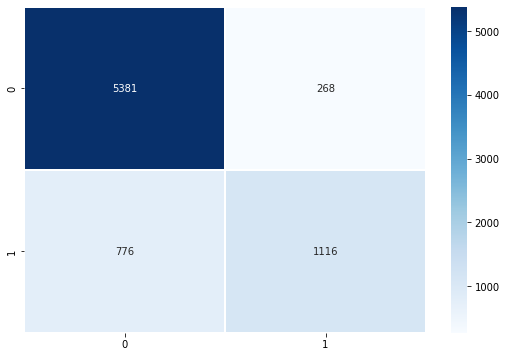

In [392]:
pca_gradient_boosting_cm = confusion_matrix(Y_test, Y_pred)

plt.subplots(figsize=(9, 6))
sns.heatmap(pca_gradient_boosting_cm, annot=True, cmap=plt.cm.Blues, fmt='d', linewidths=1)